In [10]:
#The plan
#Ok, there's two basic parts of this question. 1- Select 500 cities, 2- cycle through and grab temperature (and step 3, plot)
# It's part 1 that I'm worried about. Are we... selecting random Lat/Longs then finding a nearby city?
# that seems bad- we'll just be favoring coastal cities. I've got a different plan, outlined below, that should be more fair.

#Note long is -180 to 180, lat is -90 to 90

In [54]:
#import our libraries- I'm think random, citypy, and whatever lets us grab the weather api. +config, obvi.
import openweathermapy.core as owm
import pandas as pd
import random
import matplotlib as plt
import urllib
from citipy import citipy
#from config import api_weather - ok, so, normally this would be great. But, for github, let's allow user to input
api_weather = input("Please enter your Open Weather Map API Key: ")

#establish the weather settings, let's use Farenheit
settings = {"units": "imperial", "appid": api_weather}

Please enter your Open Weather Map API Key: 11cbc60ffa918667a87fbe4db77d4ecb


In [55]:
#In order to avoid enormous Pacific sinkholes of data, I'd like to limit our findings further.
#Let's do this:
    #counter =0
    #latitude_list=[]
    #temp_list=[]
    #whole counter = <500
        #Randomly generate coords
        #Find a nearby city with citypy
        #If city is within 200 miles:   <-----------
            #Try to send city to temp API
                #Exceptions for if the city can't be found
            #record lattitude
            #record temp
            #counter=counter+1
            

In [65]:
counter = 0
city_list = []
temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
lat_list = []
lon_list = []

while counter < 500:
    lat = random.uniform(-90,90)
    lon = random.uniform(-180,180)
    city = citipy.nearest_city(lat,lon)
    if city.city_name in city_list:
        print("{} is already in our list!".format(city.city_name))
    else:
        try:
            new_weather = owm.get_current(city.city_name, **settings)
        except urllib.error.HTTPError:
            print("{} not found in OWM.".format(city.city_name))    
        if (abs(new_weather['coord']['lon'] - lon) <10 and  #lines of longitude vary a lot. at +/-60, a degree is about 34 miles. 34*6= 204 miles
        abs(new_weather['coord']['lat'] - lat) <4):
            city_list.append(city.city_name)
            temp_list.append(new_weather['main']['temp'])
            humidity_list.append(new_weather['main']['humidity'])
            cloudiness_list.append(new_weather['clouds']['all'])
            windspeed_list.append(new_weather['wind']['speed'])
            lat_list.append(new_weather['coord']['lat'])
            lon_list.append(new_weather['coord']['lon'])
            counter = counter+1

weather_dict = {"City":city_list, "Temperature":temp_list, "Latitude": lat_list, "Longitude":lon_list, "Humidity":humidity_list, "Cloudiness":cloudiness_list, "Wind Speed":windspeed_list}
weather_df = pd.DataFrame(weather_dict)
weather_df
        #lines of lattitude are pretty constant- 3 degrees will be 68*3 - 204 miles apart

ust-kamchatsk not found in OWM.
mount gambier is already in our list!
busselton is already in our list!
taolanaro not found in OWM.
taolanaro not found in OWM.
belushya guba not found in OWM.
busselton is already in our list!
busselton is already in our list!
amderma not found in OWM.
hilo is already in our list!
vaitupu not found in OWM.
hilo is already in our list!
palabuhanratu not found in OWM.
kapaa is already in our list!
lephepe not found in OWM.
tsihombe not found in OWM.
taolanaro not found in OWM.
kapaa is already in our list!
upernavik is already in our list!
taolanaro not found in OWM.
butaritari is already in our list!
vaitupu not found in OWM.
yirol not found in OWM.
palabuhanratu not found in OWM.
avarua is already in our list!
krasnoselkup not found in OWM.
avarua is already in our list!
busselton is already in our list!
busselton is already in our list!
saleaula not found in OWM.
cherskiy is already in our list!
butaritari is already in our list!
illoqqortoormiut not f

ushuaia is already in our list!
atuona is already in our list!
henties bay is already in our list!
tsihombe not found in OWM.
namibe is already in our list!
dikson is already in our list!
rikitea is already in our list!
sentyabrskiy not found in OWM.
cherskiy is already in our list!
rikitea is already in our list!
yomitan not found in OWM.
itarema is already in our list!
amozoc not found in OWM.
saleaula not found in OWM.
ushuaia is already in our list!
torbay is already in our list!
sentyabrskiy not found in OWM.
mys shmidta not found in OWM.
ushuaia is already in our list!
barentsburg not found in OWM.
tiksi is already in our list!
taolanaro not found in OWM.
afmadu not found in OWM.
busselton is already in our list!
meyungs not found in OWM.
mehamn is already in our list!
tiksi is already in our list!
ushuaia is already in our list!
busselton is already in our list!
amderma not found in OWM.
yulara is already in our list!
puerto ayora is already in our list!
yanchukan not found in O

cape town is already in our list!
ushuaia is already in our list!
butaritari is already in our list!
amderma not found in OWM.
avarua is already in our list!
barentsburg not found in OWM.
ilulissat is already in our list!
rikitea is already in our list!
cherskiy is already in our list!
puerto ayora is already in our list!
rikitea is already in our list!
rawson is already in our list!
barentsburg not found in OWM.
dikson is already in our list!
karratha is already in our list!
cherskiy is already in our list!
illoqqortoormiut not found in OWM.
punta arenas is already in our list!
atar is already in our list!
atlantic city not found in OWM.
rikitea is already in our list!
cockburn town is already in our list!
busselton is already in our list!
nizhneyansk not found in OWM.
atuona is already in our list!
busselton is already in our list!
rikitea is already in our list!
punta arenas is already in our list!
thompson is already in our list!
coquimbo is already in our list!
norman wells is alr

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,porto nacional,8,91,-10.70,-48.41,73.46,2.75
1,clyde river,90,84,70.47,-68.59,3.20,16.11
2,touros,92,92,-5.20,-35.46,79.49,8.90
3,raudeberg,0,63,61.99,5.14,28.40,9.17
4,severo-yeniseyskiy,68,56,60.37,93.04,19.55,11.88
5,kapaa,75,83,22.08,-159.32,76.37,8.05
6,baykit,68,70,61.68,96.39,17.12,14.34
7,atuona,56,100,-9.80,-139.03,80.03,12.37
8,burnie,64,99,-41.05,145.91,62.93,21.94
9,mount gambier,24,64,-37.83,140.78,70.94,4.83


Text(0.5,1,'Temperature by Latitude')

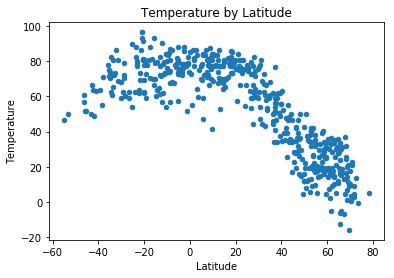

In [66]:
weather_df.plot.scatter("Latitude", "Temperature").set_title("Temperature by Latitude")

    

Text(0.5,1,'Humidity by Latitude')

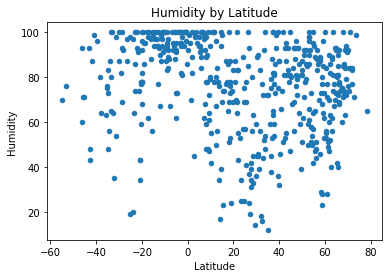

In [67]:
weather_df.plot.scatter("Latitude", "Humidity").set_title("Humidity by Latitude")

Text(0.5,1,'Cloudiness by Latitude')

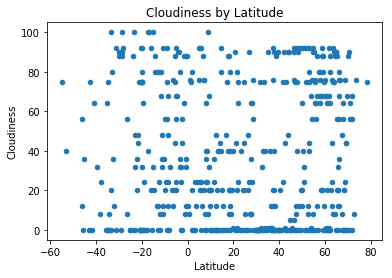

In [68]:
weather_df.plot.scatter("Latitude", "Cloudiness").set_title("Cloudiness by Latitude")

Text(0.5,1,'Wind Speed by Latitude')

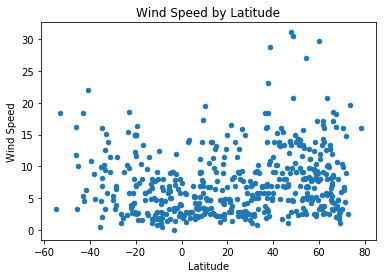

In [69]:
weather_df.plot.scatter("Latitude", "Wind Speed").set_title("Wind Speed by Latitude")